In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Движение земли вокруг солнце при виксированном положении солнца

In [2]:
def erk4(u, tau, M, mass, G):
    for m in range(M):
        w_1 = func(u[m],mass, G)
        w_2 = func(u[m] + tau*1/2*w_1, mass, G)
        w_3 = func(u[m] + tau*1/2*w_2, mass, G)
        w_4 = func(u[m] + tau*w_3, mass, G)
        u[m + 1] = u[m] + tau*(1/6*w_1 + 1/3*w_2 + 1/3*w_3 + 1/6*w_4)
        
    return u

def func(u, mass, G):
    f = np.zeros(4)
    f[0] = u[2]
    f[1] = u[3] 
    f[2] = -G*mass*u[0]/np.sqrt(u[0]**2 + u[1]**2)**3
    f[3] = -G*mass*u[1]/np.sqrt(u[0]**2 + u[1]**2)**3
    return f

Text(0.5, 0.98, 'Trajectory')

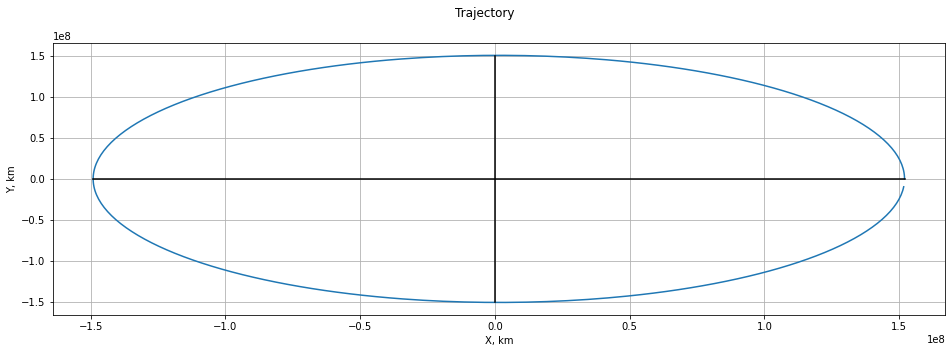

In [3]:
t_0 = 0.; T = 365*24*60*60 # seconds

x_0 = 152*10**6*1000.; y_0 = 0. # m

vx_0 = 0.; vy_0 = 29.4*1000 # m per seconds

Mass = 1.989*10**30 # kg
G = 6.67*10**(-11) # m^2/(kg*s^2)

M = 365
tau = (T - t_0) / M # step == day
t = np.linspace(t_0, T, M + 1)

u = np.zeros((M + 1, 4))
u[0,0] = x_0
u[0,1] = y_0; 
u[0,2] = vx_0
u[0,3] = vy_0;

u = erk4(u, tau, M, Mass, G)

x = u[:, 0] / 1000
y = u[:, 1] / 1000

plt.figure(figsize=(16, 5))
plt.plot(x, y)
plot(np.full(10, 0), np.linspace(-1.5, 1.5, 10)*10**8, color='black')
plot(np.linspace(-1.49, 1.521, 10)*10**8, np.full(10, 0), color='black')

plt.xlabel('X, km'); plt.ylabel('Y, km')
plt.grid(1)

plt.suptitle('Trajectory')

### Движение земли вокруг солнце при не виксированном положении солнца

In [4]:
def sun_earth(u, tau, M, m1, m2, G):
    for m in range(M):
        w_1 = func1(u[m], m1, m2, G)
        w_2 = func1(u[m] + tau*1/2*w_1, m1, m2, G)
        w_3 = func1(u[m] + tau*1/2*w_2, m1, m2, G)
        w_4 = func1(u[m] + tau*w_3, m1, m2, G)
        u[m + 1] = u[m] + tau*(1/6*w_1 + 1/3*w_2 + 1/3*w_3 + 1/6*w_4)
        
    return u

def func1(u, m1, m2, G):
    f = np.zeros(8)
    R3 = np.sqrt((u[0] - u[4])**2 + (u[1] - u[5])**2)**3
    f[0] = u[2]
    f[1] = u[3] 
    f[2] = G*m1*(u[4] - u[0])/R3
    f[3] = G*m1*(u[5] - u[1])/R3
    
    f[4] = u[6]
    f[5] = u[7] 
    f[6] = G*m2*(u[0] - u[4])/R3
    f[7] = G*m2*(u[1] - u[5])/R3
    return f

Text(0.5, 0.98, 'Trajectory')

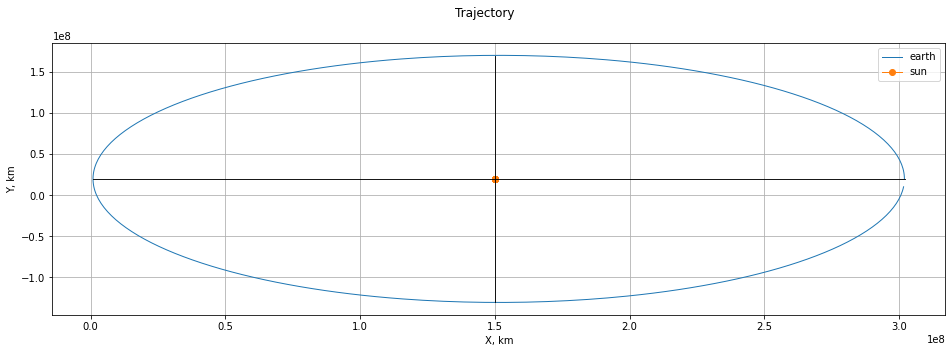

In [5]:
t_0 = 0.; T = 365*24*60*60 # seconds

m1 = 1.989*10**30 
m2 = 5.978*10**24
G = 6.67*10**(-11) 

M = 365
tau = (T - t_0) / M 
t = np.linspace(t_0, T, M + 1)

u = np.zeros((M + 1, 8))
u[0,4] = 1.5*10**11 # sun x
u[0,5] = 0.2*10**11 # sun y
u[0,6] = 0. # sun Vx
u[0,7] = 0; # sun Vy

u[0,0] = 152*10**6*1000 + u[0,4] # earth x
u[0,1] = 0. + u[0,5] # earth y
u[0,2] = 0. # earth Vx
u[0,3] = 29.4*1000; # earth Vy


u = sun_earth(u, tau, M, m1, m2, G)

earth_x = u[:, 0] / 1000
earth_y = u[:, 1] / 1000
sun_x = u[:, 4] / 1000
sun_y = u[:, 5] / 1000

plt.figure(figsize=(16, 5))
plt.plot(earth_x, earth_y, lw=1, label='earth')
plt.plot(sun_x, sun_y, '-o', lw=1, label='sun')
plot(u[0,4]/1000+np.full(10, 0), u[0,5]/1000+np.linspace(-1.5, 1.5, 10)*10**8, color='black', lw=0.9)
plot(u[0,4]/1000+np.linspace(-1.49, 1.521, 10)*10**8, u[0,5]/1000+np.full(10, 0), color='black', lw=0.9)

plt.xlabel('X, km'); plt.ylabel('Y, km')
plt.grid(1)
plt.legend()

plt.suptitle('Trajectory')